### Slade Brooks
### brooksl@mail.uc.edu
### Exam 2

In [57]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from scipy import integrate as integrate
# import custom modules
sys.path.append("..//lib//")
import pyvot

# Part A

In [58]:
# create function for function
def f(x): return (np.exp(2*x)-1)*np.sin(3*np.pi*x)*np.cos(4*np.pi*x)

# set up range of vals
xs = np.linspace(0, 1, 100)

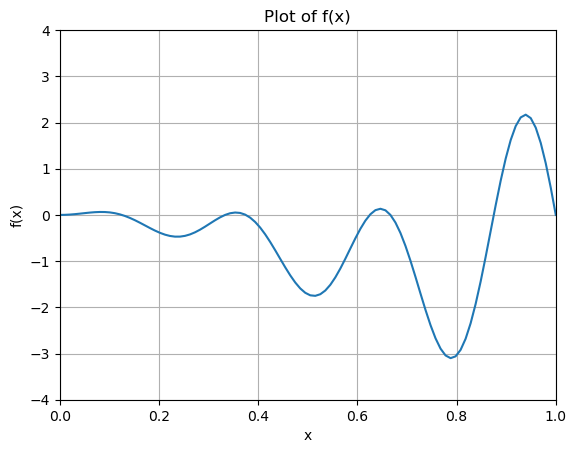

In [59]:
# plot function
plt.plot(xs, f(xs))
plt.xlabel("x")
plt.grid()
plt.ylabel("f(x)")
plt.title("Plot of f(x)")
plt.xlim([0, 1])
plt.ylim([-4, 4])
plt.show()

# Part B

In [60]:
# find first root range with rootsearch
a, b = pyvot.rootsearch(f, 0.01, 1, 0.01)

# also find ranges of next 2 roots
a1, b1 = pyvot.rootsearch(f, b, 1, 0.01)
a2, b2 = pyvot.rootsearch(f, b1, 1, 0.01)

# use bisection to find roots at each point
r = pyvot.bisection(f, a, b)
r1 = pyvot.bisection(f, a1, b1)
r2 = pyvot.bisection(f, a2, b2)

# print roots
print("The first 3 positive roots are: {0:.6f}, {1:.6f}, and {2:.6f}".format(r, r1, r2))

The first 3 positive roots are: 0.125000, 0.333333, and 0.375000


# Part C

In [61]:
# set up list of xs to test
dxs = np.arange(0, 2.5, 0.5)

# set up cent dif fxn
def centdif1(f, xs, dx):
    return (f(xs + dx) - f(xs - dx))/(2*dx)

# loop thru vals and calc deriv
derivs = [centdif1(f, x, dx=10**-5) for x in dxs]

# loop and print
for i in range(len(dxs)):
    print("The derivative of f(x) at {0:.1f} = {1:.6f}".format(dxs[i], derivs[i]))

The derivative of f(x) at 0.0 = 0.000000
The derivative of f(x) at 0.5 = -5.436564
The derivative of f(x) at 1.0 = -60.215435
The derivative of f(x) at 1.5 = 40.171073
The derivative of f(x) at 2.0 = 505.150659


# Part D

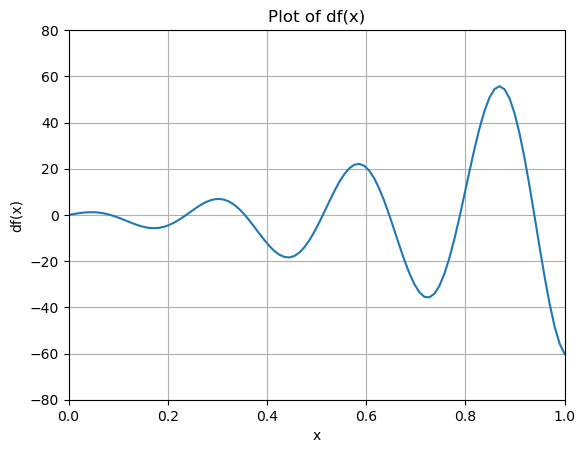

In [62]:
# create plot with the same method as before
pltdf = [centdif1(f, x, dx=10**-5) for x in xs]

# plot deriv
plt.plot(xs, pltdf)
plt.xlabel("x")
plt.grid()
plt.ylabel("df(x)")
plt.title("Plot of df(x)")
plt.xlim([0, 1])
plt.ylim([-80, 80])
plt.show()

# Part E

In [64]:
# create function again with lambda
f = lambda x: (np.exp(2*x)-1)*np.sin(3*np.pi*x)*np.cos(4*np.pi*x)

# set integration lims
a = 0
b = r

# do integration
ans, err = integrate.quad(f, a, b)

# print answer
print("The integral of f(x) from 0 to {0:.3f} is {1:.6f}".format(r, ans))

The integral of f(x) from 0 to 0.125 is 0.004350
